# Patch Extraction from Byte-Level Container Images

This notebook extracts fixed-size patches (256×256) from
byte-level container images to enable scalable learning.


In [7]:
import os
import numpy as np
from PIL import Image

PROJECT_ROOT = os.path.abspath("..")

IMAGE_DIR = os.path.join(PROJECT_ROOT, "data", "processed", "images")
PATCH_DIR = os.path.join(PROJECT_ROOT, "data", "processed", "patches")

os.makedirs(PATCH_DIR, exist_ok=True)

print("Images found:", os.listdir(IMAGE_DIR))


Images found: ['alpine_3_19.png', 'busybox.png']


In [8]:
def extract_patches(image_array, patch_size=256):
    patches = []
    height, width = image_array.shape

    for y in range(0, height - patch_size + 1, patch_size):
        patch = image_array[y:y+patch_size, 0:patch_size]
        patches.append(patch)

    return np.array(patches)


In [13]:
for img_name in os.listdir(IMAGE_DIR):
    if not img_name.endswith(".png"):
        continue

    img_path = os.path.join(IMAGE_DIR, img_name)
    print(f"\nProcessing {img_name}...")

    # Load image
    img = Image.open(img_path)
    img_array = np.array(img)

    # Extract patches
    patches = extract_patches(img_array, patch_size=256)
    print(f"  Extracted patches shape: {patches.shape}")

    # Save patches
    base_name = os.path.splitext(img_name)[0]
    patch_file = os.path.join(PATCH_DIR, f"{base_name}_patches.npy")

    np.save(patch_file, patches)
    print(f"  Saved to {patch_file}")



Processing alpine_3_19.png...
  Extracted patches shape: (52, 256, 256)
  Saved to D:\projects\prelim-thesis\data\processed\patches\alpine_3_19_patches.npy

Processing busybox.png...
  Extracted patches shape: (34, 256, 256)
  Saved to D:\projects\prelim-thesis\data\processed\patches\busybox_patches.npy


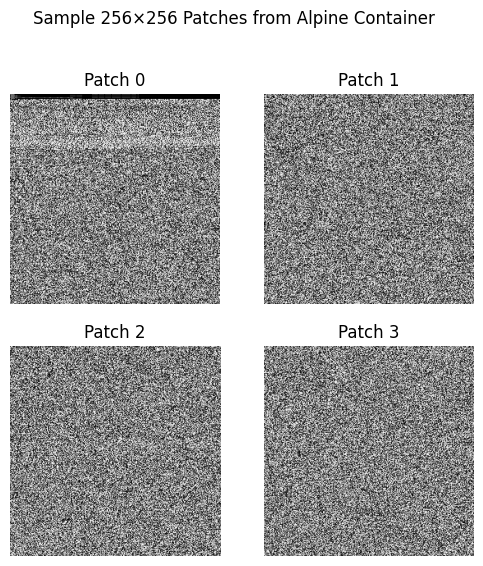

In [14]:
plt.figure(figsize=(6, 6))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(patches[i], cmap="gray")
    plt.title(f"Patch {i}")
    plt.axis("off")

plt.suptitle("Sample 256×256 Patches from Alpine Container", y=1.02)
plt.show()


In [15]:
for img_name in os.listdir(IMAGE_DIR):
    if not img_name.endswith(".png"):
        continue

    img_path = os.path.join(IMAGE_DIR, img_name)
    print(f"\nProcessing {img_name}...")

    # Load image
    img = Image.open(img_path)
    img_array = np.array(img)

    # Extract patches
    patches = extract_patches(img_array, patch_size=256)
    print(f"  Extracted patches shape: {patches.shape}")

    # Save patches
    base_name = os.path.splitext(img_name)[0]
    patch_file = os.path.join(PATCH_DIR, f"{base_name}_patches.npy")

    np.save(patch_file, patches)
    print(f"  Saved to {patch_file}")



Processing alpine_3_19.png...
  Extracted patches shape: (52, 256, 256)
  Saved to D:\projects\prelim-thesis\data\processed\patches\alpine_3_19_patches.npy

Processing busybox.png...
  Extracted patches shape: (34, 256, 256)
  Saved to D:\projects\prelim-thesis\data\processed\patches\busybox_patches.npy


## Patch-Level Observations

- Extracted patches preserve local structural patterns from the container filesystem.
- Different patches capture different regions of the container image.
- Patch-level representation enables scalable learning without processing the full image.


In [11]:
os.listdir(os.path.join(PROJECT_ROOT, "data", "processed", "patches"))


['alpine_3_19_patches.npy', 'alpine_patches.npy', 'busybox_patches.npy']